In [1]:
# Load FashionMNIST dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor()
)

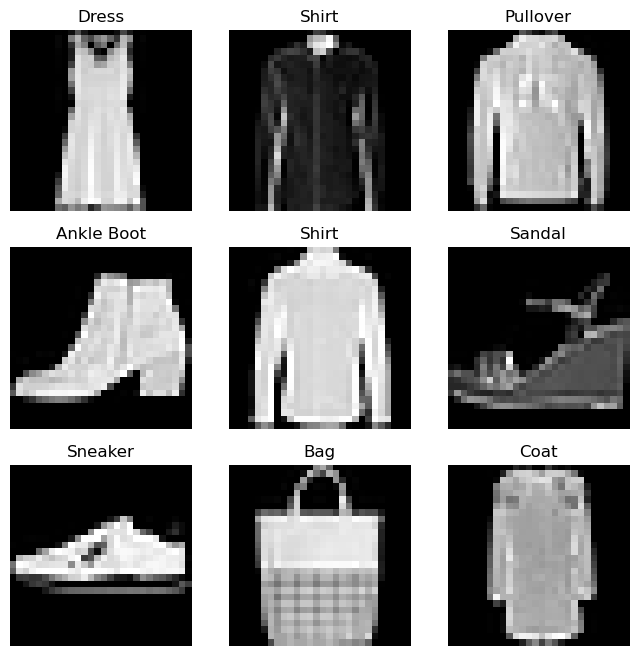

In [2]:
# Iterating and visualizing the dataset
labels_maps = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_maps[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# Create a Dataset for your files
import os
import pandas as pd
from torchvision.io import read_image


class ImageDataset(torch.utils.data.Dataset):
    
    def __init__(self, label_file, image_dir, label_transform=None, image_transform=None):
        super().__init__()
        self.image_labels = pd.read_csv(label_file)
        self.image_dir = image_dir
        self.label_transform = label_transform
        self.image_transform = image_transform
        
    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_labels.iloc[idx, 0])
        image = read_image(img.path)
        label = self.image_labels.iloc[idx, 1]
        if self.image_transform:
            image_tensor = self.image_transform(image)
        if self.label_transform:
            label_tensor = self.label_transform(label)
            
        return image_tensor, label_tensor

In [ ]:
# Dataloader can
# - Pass samples in minibatches
# - Reshuffle the data at every epoch
# - Use multiprocessing to speed up
from torch.utils.data import Dataloader

train_loader = Dataloader(training_data, batch_size=64, shuffle=True)
test_loader = Dataloader(test_data, batch_size=64, shuffle=True)

In [ ]:
# Iterate the dataloader
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
image = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(image, cmap="gray")
plt.show()
print(f"Label: {label}")